In [1]:
# 加入lumapi路径
import imp
#import os
lumapi = imp.load_source('lumapi', "C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py")
#os.add_dll_directory("C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py")
import lumapi


import matplotlib.pyplot as plt
import numpy as np
import time

# 打开fdtd仿真文件
fdtd = lumapi.FDTD(filename="fdtd_test.fsp")

# fdtd.run()
# P = fdtd.getresult("R","P")


In [4]:
# 需要切换到layout模式才可以更改参数
fdtd.switchtolayout()
# 选中平面波源
fdtd.select("PlaneSource")
# 更改中心波长
fdtd.set("center wavelength",1.5e-6)
# 运行仿真
fdtd.run()
# 读取结果 第一个参数为监视器名称，第二个为结果名称
P = fdtd.getresult("R","P")
fdtd.runsweep()
fdtd.getsweepresult()
#print(P)

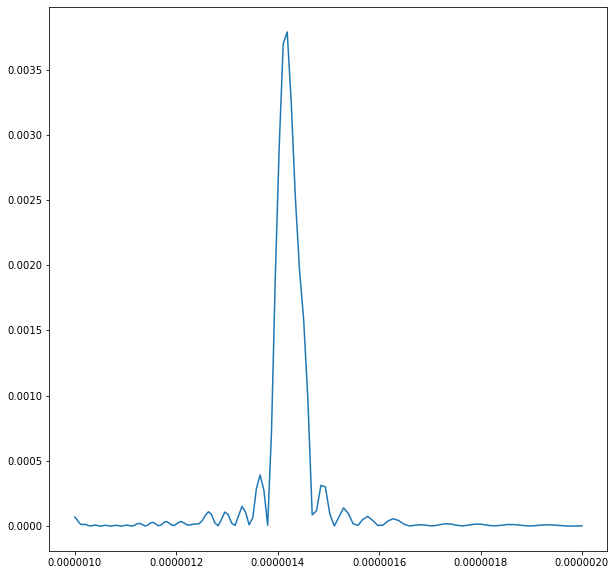

In [5]:
Power=P['P']
wavelength=P['lambda'][:,0]
xyPower=Power[0,0,0,:,:2]
Power_result=np.abs(np.sqrt(np.square(xyPower[:,0])+np.square(xyPower[:,1])))


fig=plt.figure(figsize=(10,10))
plt.subplot(1,1,1)
plt.plot(wavelength,Power_result)